In [82]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv("data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [62]:
df.shape

(614, 13)

In [95]:
counts = df['Loan_Status'].value_counts()

Loan_Status
1    332
0    148
Name: count, dtype: int64

In [92]:
plt.bar()

TypeError: bar() missing 1 required positional argument: 'height'

<Axes: ylabel='LoanAmount'>

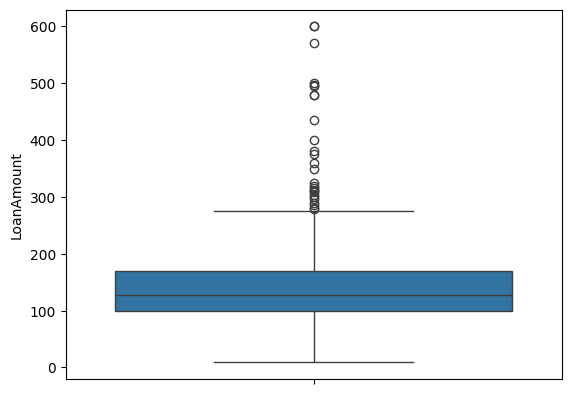

In [89]:
sns.boxplot(df['LoanAmount'])

/tmp/ipykernel_13303/413488336.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmount'])


<Axes: xlabel='LoanAmount', ylabel='Density'>

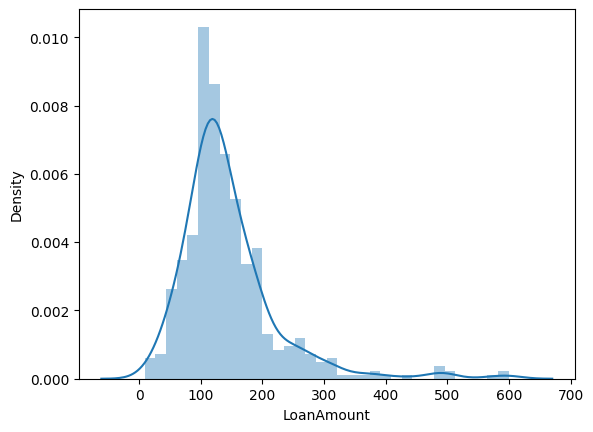

In [83]:
sns.distplot(df['LoanAmount'])

In [63]:
df = df.dropna(how='any',axis=0)

In [64]:
df.shape


(480, 13)

In [65]:
encode = LabelEncoder()
df.Loan_Status = encode.fit_transform(df.Loan_Status)

In [66]:
X = df.drop(columns=['Loan_Status','Loan_ID'],axis=1)
y = df['Loan_Status']

In [67]:
train_X, valid_X, train_y, valid_y = train_test_split(X,y,test_size=0.2)

In [68]:
train_X = pd.get_dummies(train_X)
valid_X = pd.get_dummies(valid_X)

In [69]:
model = LogisticRegression()
model.fit(train_X,train_y)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
preds = model.predict(valid_X)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(valid_y, preds)

0.8125

In [72]:
score_val = model.score(valid_X,valid_y)

In [73]:
score_val

0.8125